In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TechCareer-Bitirme/housing.csv")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


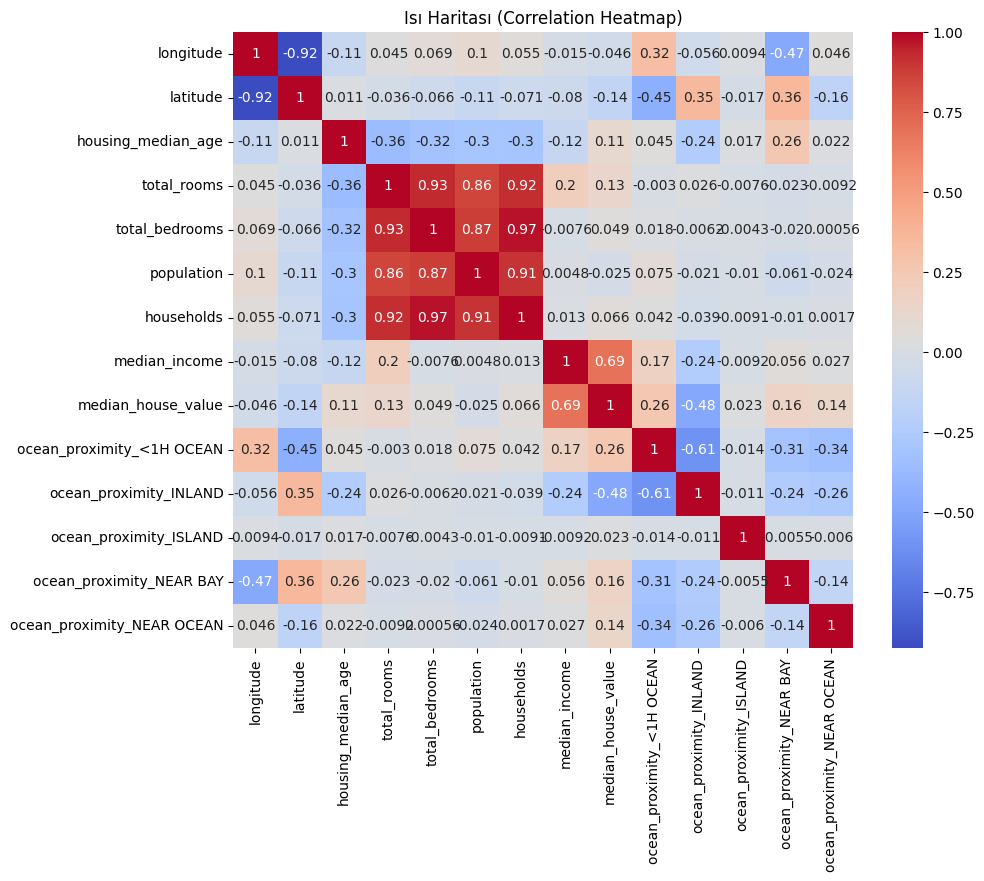

In [ ]:
# Korelasyon matrisini hesapladık
korelasyon_matrisi = df.corr()

# Isı haritasını çizdik
plt.figure(figsize=(10, 8))
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm')
plt.title("Isı Haritası (Correlation Heatmap)")
plt.show()

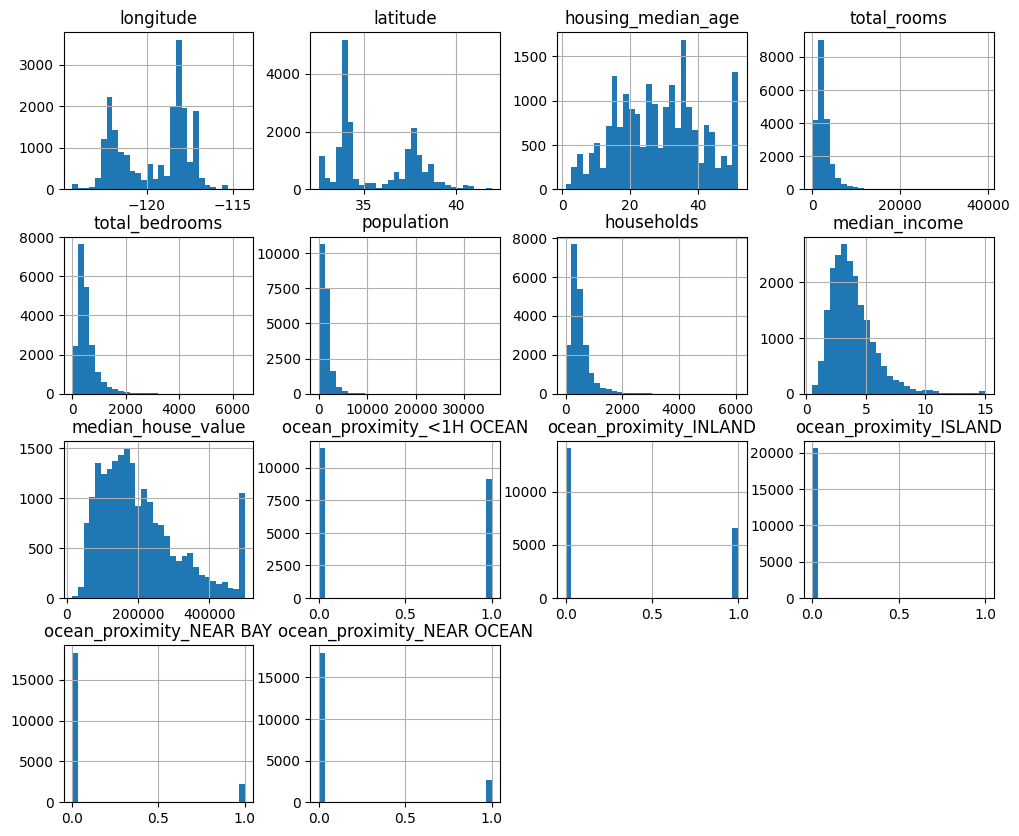

In [ ]:
# Verilerin dağılımlarını gösteren histogramları çizdik
df.hist(bins=30, figsize=(12, 10))
plt.show()

In [ ]:
# Kategorik sütunları one-hot encoding ile dönüştürmek
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [ ]:
columns = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]

# Eksik değerleri doldurmak
for column in columns:
  df[column].fillna(df[column].median(), inplace=True)

In [ ]:
# Bağımsız değişkenler (X) ve bağımlı değişken (y) olarak verileri ayırdık
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Verileri eğitim ve test veri kümelerine böldük
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer regresyon modelini oluşturduk ve eğittik
model = LinearRegression()
model.fit(X_train, y_train)

# Modeli kullanarak tahminler yapın
y_pred = model.predict(X_test)

In [ ]:
# Modelin R-kare değerini hesapladık (1'e ne kadar yakınsa, o kadar iyi)
r2 = model.score(X_test, y_test)
print("R-kare değeri:", r2)

R-kare değeri: 0.6254240620553595


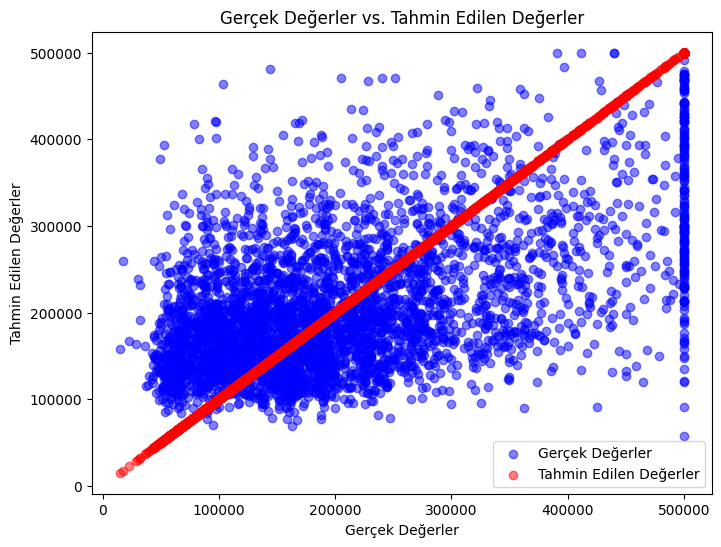

In [28]:
y_true = y_test

# Gerçek değerleri mavi yuvarlaklarla ve tahmin edilen değerleri kırmızı yuvarlaklarla gösteren dağılım grafiği
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5, color='blue', label='Gerçek Değerler')
plt.scatter(y_true, y_true, alpha=0.5, color='red', label='Tahmin Edilen Değerler')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek Değerler vs. Tahmin Edilen Değerler")
plt.legend()
plt.show()

In [30]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

r2 = model_dt.score(X_test, y_test)
print("R-kare değeri:", r2)

R-kare değeri: 0.6350266137468649


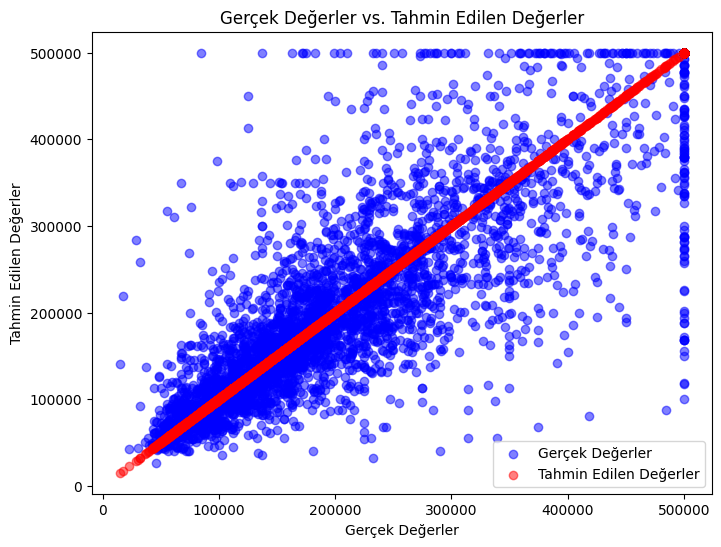

In [31]:
# Gerçek değerleri mavi yuvarlaklarla ve tahmin edilen değerleri kırmızı yuvarlaklarla gösteren dağılım grafiği
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred_dt, alpha=0.5, color='blue', label='Gerçek Değerler')
plt.scatter(y_true, y_true, alpha=0.5, color='red', label='Tahmin Edilen Değerler')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek Değerler vs. Tahmin Edilen Değerler")
plt.legend()
plt.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

r2 = model_rf.score(X_test, y_test)
print("R-kare değeri:", r2)

R-kare değeri: 0.8169411111174801


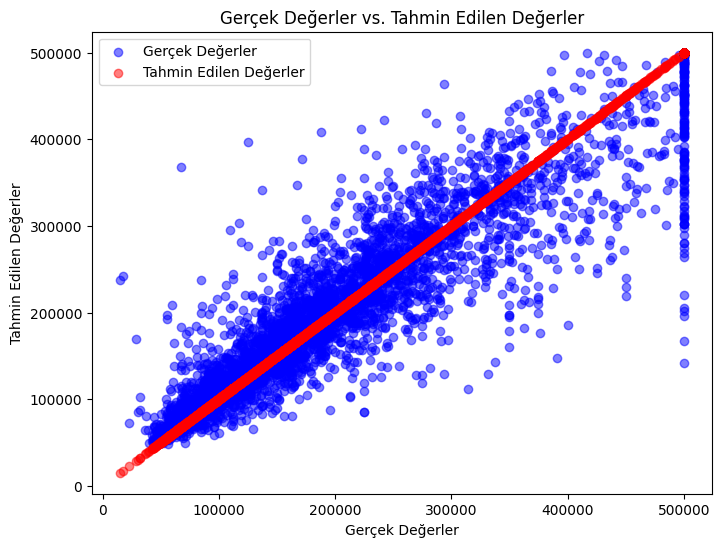

In [33]:
# Gerçek değerleri mavi yuvarlaklarla ve tahmin edilen değerleri kırmızı yuvarlaklarla gösteren dağılım grafiği
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred_rf, alpha=0.5, color='blue', label='Gerçek Değerler')
plt.scatter(y_true, y_true, alpha=0.5, color='red', label='Tahmin Edilen Değerler')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek Değerler vs. Tahmin Edilen Değerler")
plt.legend()
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

r2 = model_knn.score(X_test, y_test)
print("R-kare değeri:", r2)

R-kare değeri: 0.22632218168175855


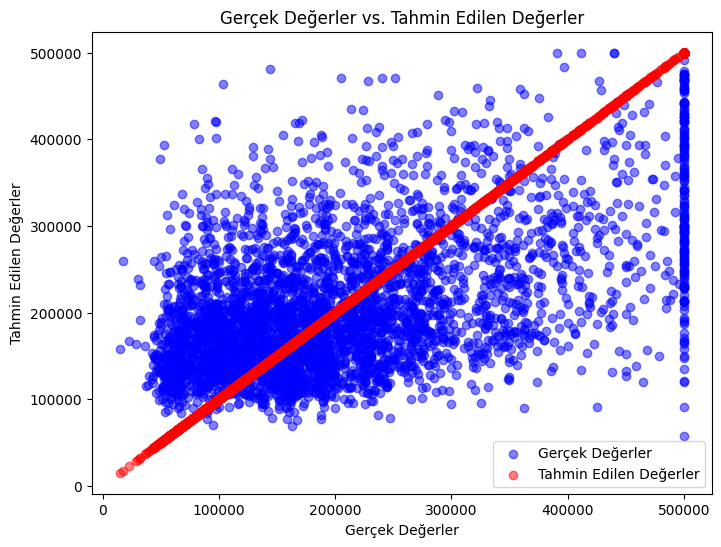

In [35]:
# Gerçek değerleri mavi yuvarlaklarla ve tahmin edilen değerleri kırmızı yuvarlaklarla gösteren dağılım grafiği
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred_knn, alpha=0.5, color='blue', label='Gerçek Değerler')
plt.scatter(y_true, y_true, alpha=0.5, color='red', label='Tahmin Edilen Değerler')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek Değerler vs. Tahmin Edilen Değerler")
plt.legend()
plt.show()